   PCA Components    Time Min    Time Max  Accuracy Min  Accuracy Max
0               5  400.426322  568.416975        0.7311        0.7463
1              10  397.497666  424.052414        0.7990        0.8217
2              50  394.568244  415.587790        0.7291        0.7457
3             100  417.499574  486.212420        0.8669        0.8820
4             250  409.579915  517.872064        0.8688        0.8881
5             500  403.153044  589.114143        0.7256        0.7464
6             700  395.907254  596.578469        0.7318        0.7443
7             784  390.957526  530.892298        0.8460        0.8739


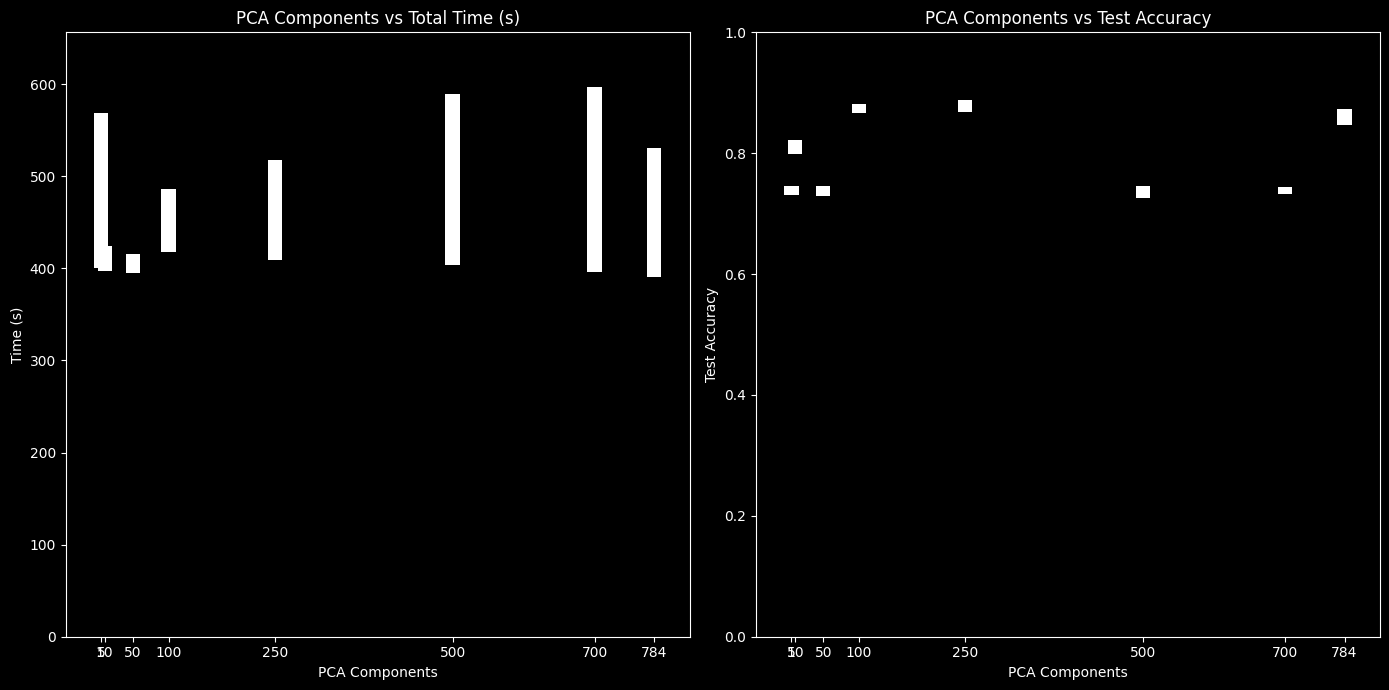

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Adjustments for dark background presentation
plt.style.use('dark_background')

# Example folder path where the CSV files are located
folder_path = '.'
files = ['pca_5_results.csv', 'pca_10_results.csv', 'pca_50_results.csv', 'pca_100_results.csv', 'pca_250_results.csv', 'pca_500_results.csv', 'pca_700_results.csv', 'pca_784_results.csv']

# Data collection
data = []
for file in files:
    df = pd.read_csv(os.path.join(folder_path, file))
    pca_components = int(file.split('_')[1].split('.')[0]) # Extracting the PCA component from the filename
    time_min, time_max = df['Total Time (s)'].min(), df['Total Time (s)'].max()
    accuracy_min, accuracy_max = df['Test Accuracy'].min(), df['Test Accuracy'].max()
    data.append((pca_components, time_min, time_max, accuracy_min, accuracy_max))

# Converting to DataFrame
data_df = pd.DataFrame(data, columns=['PCA Components', 'Time Min', 'Time Max', 'Accuracy Min', 'Accuracy Max'])
print(data_df)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 7), dpi=100)

# Time plot
bar_width = 20.0
axs[0].bar(data_df['PCA Components'], data_df['Time Max'] - data_df['Time Min'], width=bar_width, bottom=data_df['Time Min'], color='white')
axs[0].set_xlabel('PCA Components')
axs[0].set_ylabel('Time (s)')
axs[0].set_title('PCA Components vs Total Time (s)')
axs[0].set_xticks(data_df['PCA Components'])
axs[0].set_xticklabels(data_df['PCA Components'])
axs[0].set_ylim(bottom=0, top=max(data_df['Time Max'])*1.1) # Adjusting y-axis limit for better visibility

# Accuracy plot
axs[1].bar(data_df['PCA Components'], data_df['Accuracy Max'] - data_df['Accuracy Min'], width=bar_width, bottom=data_df['Accuracy Min'], color='white')
axs[1].set_xlabel('PCA Components')
axs[1].set_ylabel('Test Accuracy')
axs[1].set_title('PCA Components vs Test Accuracy')
axs[1].set_xticks(data_df['PCA Components'])
axs[1].set_xticklabels(data_df['PCA Components'])
axs[1].set_ylim(0, 1) # Assuming accuracy values are between 0 and 1

plt.tight_layout()
plt.show()